In [ ]:
import pandas as pd

# Step 1: Load the Acquired Data
# Assuming your CSV file is named 'btc_usdt_data.csv'
df = pd.read_csv('/content/btc_1h.csv')

# Display the first few rows of the original data
print("Original Data:")
print(df.head())

# Step 2: Handle Missing Data
df = df.ffill()  # Forward-fill missing values

# Display the first few rows after handling missing data
print("\nData after Handling Missing Values:")
print(df.head())

# Step 3: Adjust for Stock Splits or Corporate Actions (if applicable)
# Uncomment and modify this part based on available adjustment factor information
# df['close'] = df['close'] * adjust_factor

# Step 4: Convert Timestamps to Standardized Format
df['datetime'] = pd.to_datetime(df['datetime'])

# Display the first few rows after converting timestamps
print("\nData after Converting Timestamps:")
print(df.head())

# Step 5: Ensure Data Consistency and Compatibility
# (No additional steps in this example)

# Step 6: Perform Necessary Data Transformations (if any)
# (No additional transformations in this example)

# Step 7: Save the Preprocessed Data
df.to_csv('btc_usdt_data_preprocessed.csv', index=False)

# Display the first few rows of the preprocessed data
print("\nPreprocessed Data:")
print(df.head())


Original Data:
              datetime      open      high       low     close      volume
0  2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01  443.356199
1  2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06  383.697006
2  2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18  429.064572
3  2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03  420.087030
4  2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01  340.807329

Data after Handling Missing Values:
              datetime      open      high       low     close      volume
0  2018-01-01 05:30:00  13715.65  13715.65  13400.01  13529.01  443.356199
1  2018-01-01 06:30:00  13528.99  13595.89  13155.38  13203.06  383.697006
2  2018-01-01 07:30:00  13203.00  13418.43  13200.00  13330.18  429.064572
3  2018-01-01 08:30:00  13330.26  13611.27  13290.00  13410.03  420.087030
4  2018-01-01 09:30:00  13434.98  13623.29  13322.15  13601.01  340.807329

Data after Converting Timestamps:
             

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load preprocessed data
df = pd.read_csv('btc_usdt_data_preprocessed.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Feature selection
features = ['open', 'high', 'low', 'close', 'volume']
data = df[features].values

# Normalize data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM
sequence_length = 10  # Choose an appropriate sequence length
sequences = []
targets = []

for i in range(len(scaled_data) - sequence_length):
    sequences.append(scaled_data[i:i+sequence_length])
    targets.append(scaled_data[i+sequence_length, 3])  # Predict the next closing price

# Convert to numpy arrays
sequences = np.array(sequences)
targets = np.array(targets)

# Reshape sequences for LSTM input (samples, time steps, features)
sequences = sequences.reshape((sequences.shape[0], sequences.shape[1], len(features)))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequences.shape[1], len(features))))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(sequences, targets, epochs=50, batch_size=32)

# Save the model (optional)
model.save('btc_usdt_lstm_model.h5')


Epoch 1/50
1115/1115 [==============================] - 20s 14ms/step - loss: 2.9140e-04
Epoch 2/50
1115/1115 [==============================] - 16s 14ms/step - loss: 6.9139e-05
Epoch 3/50
1115/1115 [==============================] - 15s 13ms/step - loss: 5.7341e-05
Epoch 4/50
1115/1115 [==============================] - 15s 14ms/step - loss: 5.0479e-05
Epoch 5/50
1115/1115 [==============================] - 15s 14ms/step - loss: 4.1050e-05
Epoch 6/50
1115/1115 [==============================] - 15s 13ms/step - loss: 3.3173e-05
Epoch 7/50
1115/1115 [==============================] - 14s 13ms/step - loss: 3.1911e-05
Epoch 8/50
1115/1115 [==============================] - 14s 13ms/step - loss: 2.6118e-05
Epoch 9/50
1115/1115 [==============================] - 14s 13ms/step - loss: 2.2156e-05
Epoch 10/50
1115/1115 [==============================] - 14s 13ms/step - loss: 2.2453e-05
Epoch 11/50
1115/1115 [==============================] - 14s 13ms/step - loss: 2.2550e-05
Epoch 12/50
1115/11

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Example Prediction
last_sequence = scaled_data[-sequence_length:]
last_sequence = last_sequence.reshape((1, sequence_length, len(features)))

# Predict the next closing price
predicted_scaled_price = model.predict(last_sequence)
predicted_price = scaler.inverse_transform(np.array([[0, 0, 0, predicted_scaled_price[0, 0], 0]]))[0, 3]

print("Predicted Next Closing Price:", predicted_price)


1/1 [==============================] - 1s 920ms/step
Predicted Next Closing Price: 36783.15130990982


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step


<ipython-input-2-5ac004bc66e2>:66: RuntimeWarning: overflow encountered in double_scalars
  portfolio_values.append(capital + position * prices['close'].iloc[i])
<ipython-input-2-5ac004bc66e2>:61: RuntimeWarning: overflow encountered in double_scalars
  capital += position * prices['close'].iloc[i]
<ipython-input-2-5ac004bc66e2>:62: RuntimeWarning: invalid value encountered in double_scalars
  capital -= capital * transaction_cost_rate


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 35ms/step


ValueError: x and y must have same first dimension, but have shapes (35654,) and (35655,)

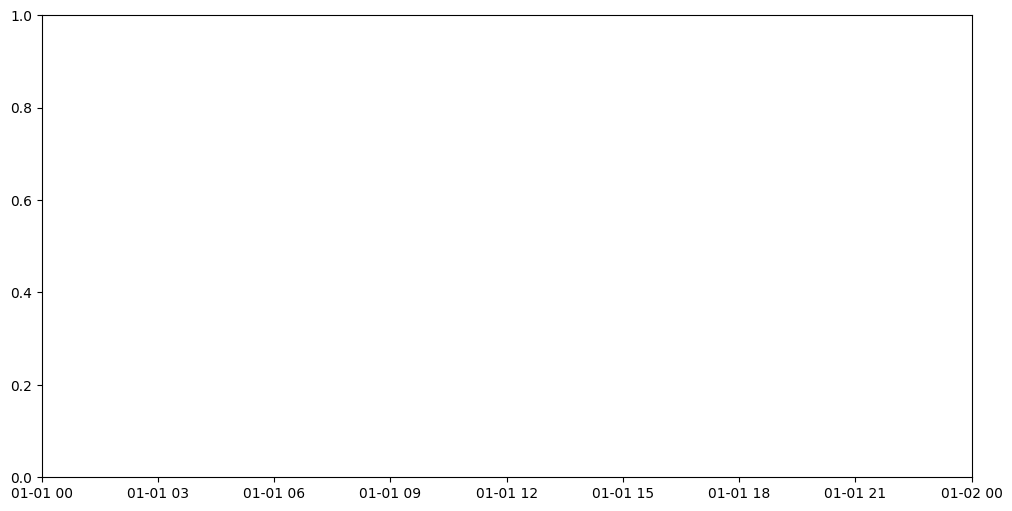

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load preprocessed data
df = pd.read_csv('/content/btc_usdt_data_preprocessed.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Backtesting parameters
initial_capital = 100000  # Initial trading capital
transaction_cost_rate = 0.0015  # 0.15% transaction cost per trade
slippage_rate = 0.0015  # 0.15% slippage per trade
sequence_length = 10  # Adjust based on your model's sequence length
features = ['open', 'high', 'low', 'close', 'volume']

# Load your trained LSTM model
model = load_model('/content/btc_usdt_lstm_model.h5')

# Load your scaler (ensure it's the same scaler used during training)
scaler = MinMaxScaler()
scaler.fit(df[features])  # Assuming 'features' is the list of features used in scaling

# Function to predict the next closing price using LSTM model
def lstm_model_predict(data, model, scaler, sequence_length, features):
    last_sequence = data[-sequence_length:]
    last_sequence = last_sequence.reshape((1, sequence_length, len(features)))
    predicted_scaled_price = model.predict(last_sequence)
    predicted_price = scaler.inverse_transform(np.array([[0, 0, 0, predicted_scaled_price[0, 0], 0]]))[0, 3]
    return predicted_price

# Function to execute trades based on LSTM model signals
def execute_trades_lstm(prices, model, scaler, sequence_length, transaction_cost_rate, slippage_rate):
    initial_position = 0.0
    position = initial_position
    capital = initial_capital
    portfolio_values = [capital]

    for i in range(sequence_length, len(prices)):
        # Extract the relevant sequence for prediction
        sequence_for_prediction = prices[features].iloc[i - sequence_length:i]

        # Scale the sequence using the same scaler used during training
        scaled_sequence = scaler.transform(sequence_for_prediction)

        # Reshape the sequence to match the LSTM model input shape
        reshaped_sequence = scaled_sequence.reshape((1, sequence_length, len(features)))

        # Generate LSTM model signal
        lstm_signal = 1 if lstm_model_predict(reshaped_sequence, model, scaler, sequence_length, features) > prices['close'].iloc[i-1] else -1

        # Buy signal
        if lstm_signal == 1:
            position = capital / prices['close'].iloc[i]
            capital -= capital * transaction_cost_rate
            capital -= capital * slippage_rate
        # Sell signal
        elif lstm_signal == -1:
            capital += position * prices['close'].iloc[i]
            capital -= capital * transaction_cost_rate
            capital -= capital * slippage_rate
            position = 0.0

        portfolio_values.append(capital + position * prices['close'].iloc[i])

    return portfolio_values

# Execute trades and track portfolio value using LSTM signals
portfolio_values_lstm = execute_trades_lstm(df, model, scaler, sequence_length, transaction_cost_rate, slippage_rate)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[sequence_length:], portfolio_values_lstm, label='Portfolio Value (LSTM)')
plt.title('Backtesting Results with LSTM Model')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USDT)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


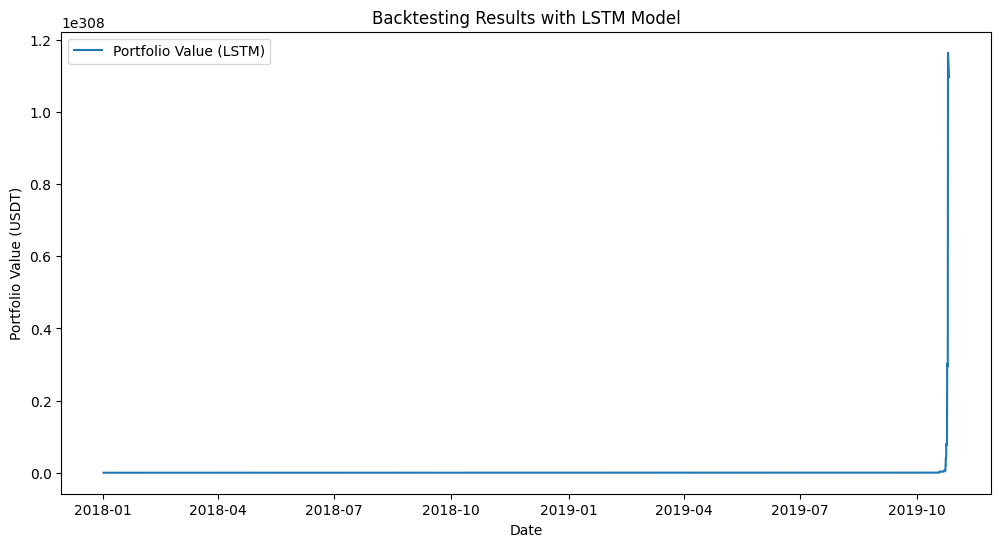

In [ ]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[sequence_length-1:], portfolio_values_lstm, label='Portfolio Value (LSTM)')
plt.title('Backtesting Results with LSTM Model')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USDT)')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Function to implement advanced risk management rules
def apply_advanced_risk_management(prices, portfolio_values, max_drawdown_pct, risk_per_trade):
    capital = initial_capital
    position = 0.0
    max_drawdown = capital * max_drawdown_pct
    portfolio_values_arm = [capital]
    historical_max_portfolio_value = capital

    for i in range(1, len(prices)):
        # Calculate daily PnL
        pnl = (portfolio_values[i] - portfolio_values[i - 1]) / portfolio_values[i - 1]

        # Check for dynamic risk adjustment based on historical drawdown
        historical_max_portfolio_value = max(historical_max_portfolio_value, portfolio_values[i])
        current_drawdown = (historical_max_portfolio_value - portfolio_values[i]) / historical_max_portfolio_value

        # Adjust position size based on risk per trade and dynamic risk adjustment
        adjusted_risk_per_trade = risk_per_trade * (1 - np.exp(-current_drawdown / 0.1))
        target_position = capital * adjusted_risk_per_trade
        position = min(target_position / prices['close'].iloc[i], 1.0)

        # Check for max drawdown breach and reset historical max portfolio value
        if portfolio_values[i] < historical_max_portfolio_value - max_drawdown:
            historical_max_portfolio_value = portfolio_values[i]

        # Update capital based on daily returns
        capital += pnl * capital

        portfolio_values_arm.append(capital + position * prices['close'].iloc[i])

    return portfolio_values_arm

# Define advanced risk management parameters
max_drawdown_pct = 0.05  # 5% maximum drawdown
risk_per_trade = 0.02  # 2% risk per trade

# Apply advanced risk management to the LSTM backtested portfolio
portfolio_values_lstm_arm = apply_advanced_risk_management(df, portfolio_values_lstm, max_drawdown_pct, risk_per_trade)

# Plot results with advanced risk management
plt.figure(figsize=(12, 6))
plt.plot(df.index[sequence_length:], portfolio_values_lstm_arm, label='Portfolio Value (LSTM with Advanced Risk Management)')
plt.title('Backtesting Results with LSTM Model and Advanced Risk Management')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USDT)')
plt.legend()
plt.show()


<ipython-input-4-10bb0fcf1cc1>:17: RuntimeWarning: invalid value encountered in double_scalars
  current_drawdown = (historical_max_portfolio_value - portfolio_values[i]) / historical_max_portfolio_value


IndexError: list index out of range

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 28ms/step


<ipython-input-11-4e76d15b6b90>:66: RuntimeWarning: overflow encountered in double_scalars
  portfolio_values.append(capital + position * prices['close'].iloc[i])
<ipython-input-11-4e76d15b6b90>:61: RuntimeWarning: overflow encountered in double_scalars
  capital += position * prices['close'].iloc[i]
<ipython-input-11-4e76d15b6b90>:62: RuntimeWarning: invalid value encountered in double_scalars
  capital -= capital * transaction_cost_rate


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 34ms/step


ValueError: x and y must have same first dimension, but have shapes (35654,) and (35655,)

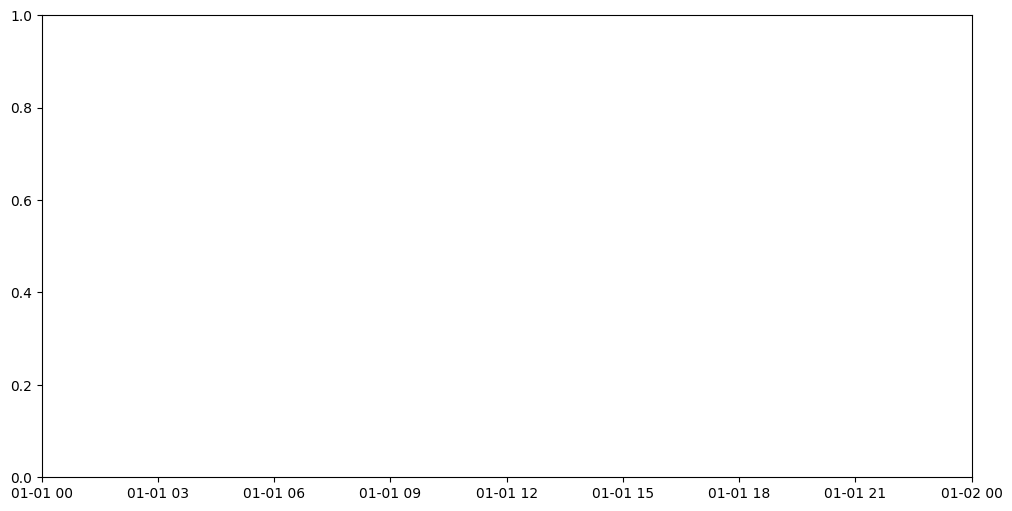

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load preprocessed data
df = pd.read_csv('/content/btc_usdt_data_preprocessed.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Backtesting parameters
initial_capital = 100000  # Initial trading capital
transaction_cost_rate = 0.0015  # 0.15% transaction cost per trade
slippage_rate = 0.0015  # 0.15% slippage per trade
sequence_length = 10  # Adjust based on your model's sequence length
features = ['open', 'high', 'low', 'close', 'volume']

# Load your trained LSTM model
model = load_model('/content/btc_usdt_lstm_model.h5')

# Load your scaler (ensure it's the same scaler used during training)
scaler = MinMaxScaler()
scaler.fit(df[features])  # Assuming 'features' is the list of features used in scaling

# Function to predict the next closing price using LSTM model
def lstm_model_predict(data, model, scaler, sequence_length, features):
    last_sequence = data[-sequence_length:]
    last_sequence = last_sequence.reshape((1, sequence_length, len(features)))
    predicted_scaled_price = model.predict(last_sequence)
    predicted_price = scaler.inverse_transform(np.array([[0, 0, 0, predicted_scaled_price[0, 0], 0]]))[0, 3]
    return predicted_price

# Function to execute trades based on LSTM model signals
def execute_trades_lstm(prices, model, scaler, sequence_length, transaction_cost_rate, slippage_rate, features):
    initial_position = 0.0
    position = initial_position
    capital = initial_capital
    portfolio_values = [capital]

    for i in range(sequence_length, len(prices)):
        # Extract the relevant sequence for prediction
        sequence_for_prediction = prices[features].iloc[i - sequence_length:i]

        # Scale the sequence using the same scaler used during training
        scaled_sequence = scaler.transform(sequence_for_prediction)

        # Reshape the sequence to match the LSTM model input shape
        reshaped_sequence = scaled_sequence.reshape((1, sequence_length, len(features)))

        # Generate LSTM model signal
        lstm_signal = 1 if lstm_model_predict(reshaped_sequence, model, scaler, sequence_length, features) > prices['close'].iloc[i-1] else -1

        # Buy signal
        if lstm_signal == 1:
            position = capital / prices['close'].iloc[i]
            capital -= capital * transaction_cost_rate
            capital -= capital * slippage_rate
        # Sell signal
        elif lstm_signal == -1:
            capital += position * prices['close'].iloc[i]
            capital -= capital * transaction_cost_rate
            capital -= capital * slippage_rate
            position = 0.0

        portfolio_values.append(capital + position * prices['close'].iloc[i])

    return portfolio_values

# Execute trades and track portfolio value using LSTM signals
portfolio_values_lstm = execute_trades_lstm(df, model, scaler, sequence_length, transaction_cost_rate, slippage_rate, features)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index[sequence_length:], portfolio_values_lstm, label='Portfolio Value (LSTM)')
plt.title('Backtesting Results with LSTM Model')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USDT)')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load preprocessed data
df = pd.read_csv('/content/btc_usdt_data_preprocessed.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Backtesting parameters
initial_capital = 100000  # Initial trading capital
transaction_cost_rate = 0.0015  # 0.15% transaction cost per trade
slippage_rate = 0.0015  # 0.15% slippage per trade
sequence_length = 10  # Adjust based on your model's sequence length
features = ['open', 'high', 'low', 'close', 'volume']

# Load your trained LSTM model
model = load_model('/content/btc_usdt_lstm_model.h5')

# Load your scaler (ensure it's the same scaler used during training)
scaler = MinMaxScaler()
scaler.fit(df[features])  # Assuming 'features' is the list of features used in scaling

# Function to predict the next closing price using LSTM model
def lstm_model_predict(data, model, scaler, sequence_length, features):
    last_sequence = data[-sequence_length:]
    last_sequence = last_sequence.reshape((1, sequence_length, len(features)))
    predicted_scaled_price = model.predict(last_sequence)
    predicted_price = scaler.inverse_transform(np.array([[0, 0, 0, predicted_scaled_price[0, 0], 0]]))[0, 3]
    return predicted_price

# Function to implement advanced risk management rules
def apply_advanced_risk_management(prices, portfolio_values, max_drawdown_pct, risk_per_trade):
    capital = initial_capital
    position = 0.0
    max_drawdown = capital * max_drawdown_pct
    portfolio_values_arm = [capital]
    historical_max_portfolio_value = capital

    for i in range(1, len(prices)):
        # Calculate daily PnL
        pnl = (portfolio_values[i] - portfolio_values[i - 1]) / portfolio_values[i - 1]

        # Check for dynamic risk adjustment based on historical drawdown
        historical_max_portfolio_value = max(historical_max_portfolio_value, portfolio_values[i])
        current_drawdown = (historical_max_portfolio_value - portfolio_values[i]) / historical_max_portfolio_value

        # Adjust position size based on risk per trade and dynamic risk adjustment
        adjusted_risk_per_trade = risk_per_trade * (1 - np.exp(-current_drawdown / 0.1))
        target_position = capital * adjusted_risk_per_trade
        position = min(target_position / prices['close'].iloc[i], 1.0)

        # Check for max drawdown breach and reset historical max portfolio value
        if portfolio_values[i] < historical_max_portfolio_value - max_drawdown:
            historical_max_portfolio_value = portfolio_values[i]

        # Update capital based on daily returns
        capital += pnl * capital

        portfolio_values_arm.append(capital + position * prices['close'].iloc[i])

    return portfolio_values_arm

# Define advanced risk management parameters
max_drawdown_pct = 0.05  # 5% maximum drawdown
risk_per_trade = 0.02  # 2% risk per trade

# Apply advanced risk management to the LSTM backtested portfolio
portfolio_values_lstm_arm = apply_advanced_risk_management(df, portfolio_values_lstm, max_drawdown_pct, risk_per_trade)

# Plot results with advanced risk management
plt.figure(figsize=(12, 6))
plt.plot(df.index[sequence_length:], portfolio_values_lstm_arm, label='Portfolio Value (LSTM with Advanced Risk Management)')
plt.title('Backtesting Results with LSTM Model and Advanced Risk Management')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USDT)')
plt.legend()
plt.show()


<ipython-input-12-89056440412a>:48: RuntimeWarning: invalid value encountered in double_scalars
  current_drawdown = (historical_max_portfolio_value - portfolio_values[i]) / historical_max_portfolio_value


IndexError: list index out of range

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

# Load preprocessed data
df = pd.read_csv('/content/btc_usdt_data_preprocessed.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Backtesting parameters
initial_capital = 100000  # Initial trading capital
transaction_cost_rate = 0.0015  # 0.15% transaction cost per trade
slippage_rate = 0.0015  # 0.15% slippage per trade
sequence_length = 10  # Adjust based on your model's sequence length
features = ['open', 'high', 'low', 'close', 'volume']

# Load your trained LSTM model
model = load_model('/content/btc_usdt_lstm_model.h5')

# Load your scaler (ensure it's the same scaler used during training)
scaler = MinMaxScaler()
scaler.fit(df[features])  # Assuming 'features' is the list of features used in scaling

# Function to predict the next closing price using LSTM model
def lstm_model_predict(data, model, scaler, sequence_length, features):
    last_sequence = data[-sequence_length:]
    last_sequence = last_sequence.reshape((1, sequence_length, len(features)))
    predicted_scaled_price = model.predict(last_sequence)
    predicted_price = scaler.inverse_transform(np.array([[0, 0, 0, predicted_scaled_price[0, 0], 0]]))[0, 3]
    return predicted_price

# Corrected execute_trades_lstm function
def execute_trades_lstm(prices, model, scaler, sequence_length, transaction_cost_rate, slippage_rate):
    initial_position = 0.0
    position = initial_position
    capital = initial_capital
    portfolio_values = [capital]

    for i in range(sequence_length, len(prices)):
        # Extract the relevant sequence for prediction
        sequence_for_prediction = prices[features].iloc[i - sequence_length:i]

        # Scale the sequence using the same scaler used during training
        scaled_sequence = scaler.transform(sequence_for_prediction)

        # Reshape the sequence to match the LSTM model input shape
        reshaped_sequence = scaled_sequence.reshape((1, sequence_length, len(features)))

        # Generate LSTM model signal
        lstm_signal = 1 if lstm_model_predict(reshaped_sequence, model, scaler, sequence_length, features) > prices['close'].iloc[i-1] else -1

        # Buy signal
        if lstm_signal == 1:
            position = capital / prices['close'].iloc[i]
            capital -= capital * transaction_cost_rate
            capital -= capital * slippage_rate
        # Sell signal
        elif lstm_signal == -1:
            capital += position * prices['close'].iloc[i]
            capital -= capital * transaction_cost_rate
            capital -= capital * slippage_rate
            position = 0.0

        portfolio_values.append(capital + position * prices['close'].iloc[i])

    return portfolio_values

# Function to implement advanced risk management rules
def apply_advanced_risk_management(prices, portfolio_values, max_drawdown_pct, risk_per_trade):
    capital = initial_capital
    position = 0.0
    max_drawdown = capital * max_drawdown_pct
    portfolio_values_arm = [capital]
    historical_max_portfolio_value = capital

    for i in range(1, len(prices)):
        # Calculate daily PnL
        pnl = (portfolio_values[i] - portfolio_values[i - 1]) / portfolio_values[i - 1]

        # Check for dynamic risk adjustment based on historical drawdown
        historical_max_portfolio_value = max(historical_max_portfolio_value, portfolio_values[i])
        current_drawdown = (historical_max_portfolio_value - portfolio_values[i]) / historical_max_portfolio_value

        # Adjust position size based on risk per trade and dynamic risk adjustment
        adjusted_risk_per_trade = risk_per_trade * (1 - np.exp(-current_drawdown / 0.1))
        target_position = capital * adjusted_risk_per_trade
        position = min(target_position / prices['close'].iloc[i], 1.0)

        # Check for max drawdown breach and reset historical max portfolio value
        if portfolio_values[i] < historical_max_portfolio_value - max_drawdown:
            historical_max_portfolio_value = portfolio_values[i]

        # Update capital based on daily returns
        capital += pnl * capital

        portfolio_values_arm.append(capital + position * prices['close'].iloc[i])

    return portfolio_values_arm

# Define advanced risk management parameters
max_drawdown_pct = 0.05  # 5% maximum drawdown
risk_per_trade = 0.02  # 2% risk per trade

# Execute trades and track portfolio value using LSTM signals
portfolio_values_lstm = execute_trades_lstm(df, model, scaler, sequence_length, transaction_cost_rate, slippage_rate)

# Apply advanced risk management to the LSTM backtested portfolio
portfolio_values_lstm_arm = apply_advanced_risk_management(df, portfolio_values_lstm, max_drawdown_pct, risk_per_trade)

# Plot results with advanced risk management
plt.figure(figsize=(12, 6))
plt.plot(df.index[sequence_length:], portfolio_values_lstm_arm, label='Portfolio Value (LSTM with Advanced Risk Management)')
plt.title('Backtesting Results with LSTM Model and Advanced Risk Management')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USDT)')
plt.legend()
plt.show()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step


<ipython-input-13-78181011bb1f>:66: RuntimeWarning: overflow encountered in double_scalars
  portfolio_values.append(capital + position * prices['close'].iloc[i])
<ipython-input-13-78181011bb1f>:61: RuntimeWarning: overflow encountered in double_scalars
  capital += position * prices['close'].iloc[i]
<ipython-input-13-78181011bb1f>:62: RuntimeWarning: invalid value encountered in double_scalars
  capital -= capital * transaction_cost_rate


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step


<ipython-input-13-78181011bb1f>:84: RuntimeWarning: invalid value encountered in double_scalars
  current_drawdown = (historical_max_portfolio_value - portfolio_values[i]) / historical_max_portfolio_value


IndexError: list index out of range